In [1]:
# Data Preparation
from pandas import read_csv, DataFrame
from dslabs_functions import get_variable_types, encode_cyclic_variables, dummify

In [2]:
file_tag = "cyber_attacks"
filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\telecom_churn_dataset\\Telecom_Customers_Churn.csv"

data: DataFrame = read_csv(filename, index_col="customerID", na_values=" ")
data: DataFrame = read_csv(filename, na_values=" ")
vars: dict[str, list] = get_variable_types(data)

yes_no: dict[str, int] = {"no": 0, "No": 0, "yes": 1, "Yes": 1}
gender_values: dict[str, int] = {"Male": 0, "Female": 1}
multiple_lines_values: dict[str, int] = {"No phone service": 0, "no": 0, "No": 0, "Yes": 1, "yes": 1}
payment_method_values: dict[str, int] = {"Mailed check": 0, "Electronic check": 1,"Bank transfer (automatic)": 2, "Credit card (automatic)": 3}
INET_values: dict[str, int] = {"No": 0, "DSL": 1, "Fiber optic": 2} 
internet_service_values: dict[str, int] = {"No": 0, "No internet service": 0, "Yes": 1, "yes": 1}

encoding: dict[str, dict[str, int]] = {
    "gender": gender_values,
    "Partner": yes_no,
    "Dependents": yes_no,
    "PhoneService": yes_no,
    "MultipleLines": multiple_lines_values,
    "InternetService": INET_values,
    "OnlineSecurity": internet_service_values,
    "OnlineBackup": internet_service_values,
    "DeviceProtection": internet_service_values,
    "TechSupport": internet_service_values,
    "StreamingTV": internet_service_values,
    "StreamingMovies": internet_service_values,
    "PaperlessBilling": yes_no,
    "PaymentMethod": payment_method_values,
    "Churn": yes_no,
}
df: DataFrame = data.replace(encoding, inplace=False)
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,1,1,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,0,0,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,1,0,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,Month-to-month,1,1,70.70,151.65,1


In [3]:
from numpy import ndarray
from pandas import DataFrame, read_csv, concat
from sklearn.preprocessing import OneHotEncoder


def dummify(df: DataFrame, vars_to_dummify: list[str]) -> DataFrame:
    other_vars: list[str] = [c for c in df.columns if not c in vars_to_dummify]

    enc = OneHotEncoder(
        handle_unknown="ignore", sparse_output=False, dtype="bool", drop="if_binary"
    )
    trans: ndarray = enc.fit_transform(df[vars_to_dummify])

    new_vars: ndarray = enc.get_feature_names_out(vars_to_dummify)
    dummy = DataFrame(trans, columns=new_vars, index=df.index)

    final_df: DataFrame = concat([df[other_vars], dummy], axis=1)
    return final_df


filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\telecom_churn_dataset\\Telecom_Customers_Churn.csv"

data: DataFrame = read_csv(filename, index_col="customerID", na_values=" ")

vars: list[str] = ["Contract"]
df: DataFrame = dummify(df, vars)

cols = list(df.columns)
cols = cols[0:15:]+ cols[-3::1] + cols[16:-3:]
df = df[cols]
print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                1               0  ...   
1             1              0                1               1  ...   
2             1              0                1               1  ...   
3             0              0                1               1  ...   
4             1              0                2               0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract_Month-to-month  \
0            0            0                0                     True   
1     

In [4]:
data_fgen = df
data_fgen.insert(20, "Cost/service",0)
data_fgen.insert(21, "SecurityCost",0)
data_fgen.insert(22, "StreamingCost",0)

In [5]:
# Feature Generation

# Feature Cost / Service

for i in range(0, 7043):
    services = data_fgen.loc[i,"PhoneService"] + data_fgen.loc[i,"InternetService"] + data_fgen.loc[i,"OnlineSecurity"] + data_fgen.loc[i,"OnlineBackup"] + data_fgen.loc[i,"TechSupport"] + data_fgen.loc[i,"StreamingTV"] + data_fgen.loc[i,"StreamingMovies"]
    if services == 0:
        data_fgen.loc[i,"Cost/service"] = 0
    else:
        data_fgen.loc[i,"Cost/service"] = df.loc[i, "TotalCharges"] / services

for i in range(0, 7043):
    sec_services = data_fgen.loc[i,"OnlineSecurity"] + data_fgen.loc[i,"OnlineBackup"]
    stream_services = data_fgen.loc[i,"StreamingTV"] + data_fgen.loc[i,"StreamingMovies"]
    if sec_services != 0:
        data_fgen.loc[i, "SecurityCost"] = data_fgen.loc[i,"Cost/service"] * sec_services
    else: data_fgen.loc[i, "SecurityCost"] = 0
    if stream_services != 0:
        data_fgen.loc[i, "StreamingCost"] = data_fgen.loc[i,"Cost/service"] * stream_services
    else: data_fgen.loc[i, "StreamingCost"] = 0        

df = data_fgen.drop(columns=["customerID"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod,MonthlyCharges,Cost/service,SecurityCost,StreamingCost,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,...,True,False,False,1,29.85,14.925000,14.925000,0.0,29.85,0
1,0,0,0,0,34,1,0,1,1,0,...,False,True,False,0,56.95,629.833333,629.833333,0.0,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,...,True,False,False,0,53.85,27.037500,54.075000,0.0,108.15,1
3,0,0,0,0,45,0,0,1,1,0,...,False,True,False,2,42.30,613.583333,613.583333,0.0,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,...,True,False,False,1,70.70,50.550000,0.000000,0.0,151.65,1


{'numeric': ['tenure', 'InternetService', 'PaymentMethod', 'MonthlyCharges', 'Cost/service', 'SecurityCost', 'StreamingCost', 'TotalCharges'], 'binary': ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'Churn'], 'date': [], 'symbolic': []}


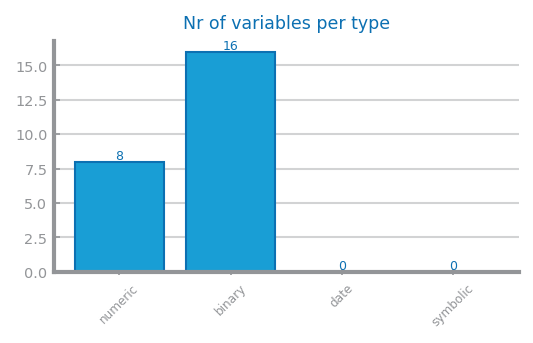

gender                       int64
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                       int64
PhoneService                 int64
MultipleLines                int64
InternetService              int64
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
Contract_Month-to-month       bool
Contract_One year             bool
Contract_Two year             bool
PaymentMethod                int64
MonthlyCharges             float64
Cost/service               float64
SecurityCost               float64
StreamingCost              float64
TotalCharges               float64
Churn                        int64
dtype: object

In [6]:
# Figure 2 - Data Dimensionality - Variables/type
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart
from dslabs_functions import get_variable_types

variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
#savefig(f"images/2_{file_tag}_variable_types.png")
show()

symbolic: list[str] = variable_types["symbolic"]
df[symbolic] = df[symbolic].apply(lambda x: x.astype("category"))
df.dtypes

In [7]:
df.shape

(7043, 24)

In [8]:
# Data Preparation - Missing Values - Option 1 - Drop missing values
data_mv1 = df
data_mv1: DataFrame = data_mv1.dropna(how="any", inplace=False)
data_mv1.shape

(7032, 24)

In [9]:
# Data Preparation - Missing Values - Option 2 - Fill missing values
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import get_variable_types, mvi_by_filling


def mvi_by_filling(data: DataFrame, strategy: str = "frequent") -> DataFrame:
    df: DataFrame
    variables: dict = get_variable_types(data)
    stg_num, v_num = "mean", -1
    stg_sym, v_sym = "most_frequent", "NA"
    stg_bool, v_bool = "most_frequent", False
    if strategy != "knn":
        lst_dfs: list = []
        if strategy == "constant":
            stg_num, stg_sym, stg_bool = "constant", "constant", "constant"
        if len(variables["numeric"]) > 0:
            imp = SimpleImputer(strategy=stg_num, fill_value=v_num, copy=True)
            tmp_nr = DataFrame(
                imp.fit_transform(data[variables["numeric"]]),
                columns=variables["numeric"],
            )
            lst_dfs.append(tmp_nr)
        if len(variables["symbolic"]) > 0:
            imp = SimpleImputer(strategy=stg_sym, fill_value=v_sym, copy=True)
            tmp_sb = DataFrame(
                imp.fit_transform(data[variables["symbolic"]]),
                columns=variables["symbolic"],
            )
            lst_dfs.append(tmp_sb)
        if len(variables["binary"]) > 0:
            imp = SimpleImputer(strategy=stg_bool, fill_value=v_bool, copy=True)
            tmp_bool = DataFrame(
                imp.fit_transform(data[variables["binary"]]),
                columns=variables["binary"],
            )
            lst_dfs.append(tmp_bool)
        df = concat(lst_dfs, axis=1)
    else:
        imp = KNNImputer(n_neighbors=5)
        imp.fit(data)
        ar: ndarray = imp.transform(data)
        df = DataFrame(ar, columns=data.columns, index=data.index)
    return df


data_mv2: DataFrame = mvi_by_filling(df, strategy="mean")
#data_mv2.head(10)

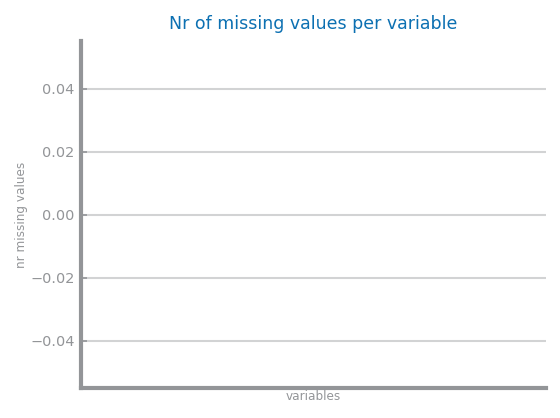

In [10]:
# Figure 3 - Data Dimensionality - #Missing/Variables
mv: dict[str, int] = {}
for var in data_mv2.columns:
    nr: int = data_mv2[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
#savefig(f"images/3_{file_tag}_mv.png")
show()

In [11]:
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN


def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
    #if eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval

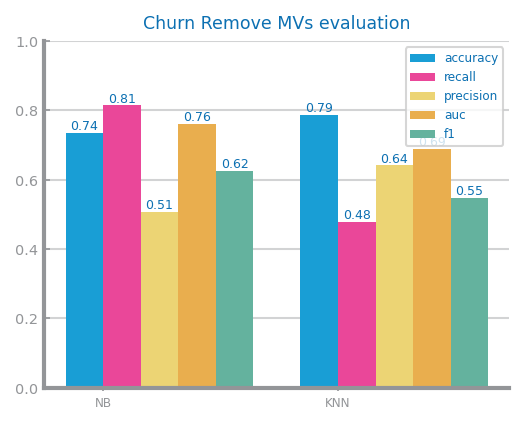

In [12]:
# Figure 19 - evaluating MV approaches - Approach 1 - NOK

# Splitting dataset into train and test datasets
#filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\telecom_churn_dataset\\Telecom_Customers_Churn.csv"

#chunks = read_csv(filename, chunksize=6000)
train = data_mv1.head(5000)
test = data_mv1.tail(1000)
test.head()

file_tag = "Churn"
filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\telecom_churn_dataset\\Telecom_Customers_Churn.csv"

target = "Churn"

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} Remove MVs evaluation", percentage=True
)
savefig(f"images/19_{file_tag}_eval.png")
show()


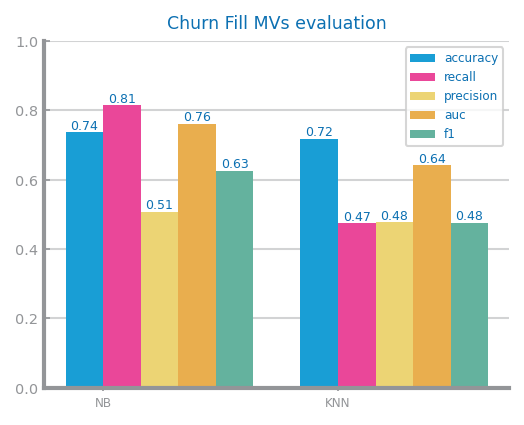

In [13]:
# Figure 19 - evaluating MV approaches - Approach 2 - OK

train = data_mv2.head(5999)
test = data_mv2.tail(1000)
#test.head()

file_tag = "Churn"
#filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\telecom_churn_dataset\\Telecom_Customers_Churn.csv"

target = "Churn"

#train: DataFrame = read_csv("data/stroke_train.csv")
#test: DataFrame = read_csv("data/stroke_test.csv")

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} Fill MVs evaluation", percentage=True
)
savefig(f"images/19_{file_tag}_eval_2.png")
show()

In [14]:
# Auxiliary functions to identify outliers
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart

NR_STDEV: int = 2
IQR_FACTOR: float = 1.5

def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom


def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = data[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}


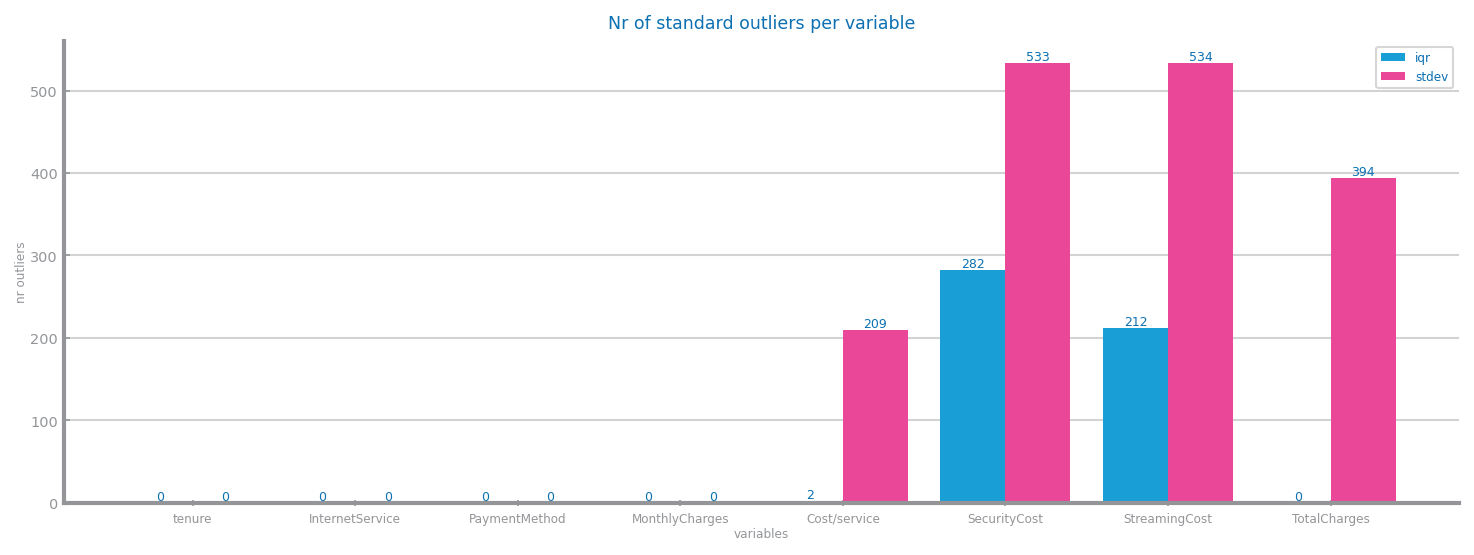

In [15]:
# Step 1 - Identifying outliers
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart
from dslabs_functions import get_variable_types
from dslabs_functions import define_grid, HEIGHT

variables_types: dict[str, list] = get_variable_types(data_mv2)
numeric: list[str] = variables_types["numeric"]

if [] != numeric:
    outliers: dict[str, int] = count_outliers(data_mv2, numeric)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
#    savefig(f"images/21_{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

In [16]:
# Figure 21 - Outliers Treatment - Option 1 Drop outliers

from pandas import read_csv, DataFrame, Series
from dslabs_functions import (
    NR_STDEV,
    get_variable_types,
    determine_outlier_thresholds_for_var,
)
data_out1 = data_mv2
file_tag = "churn"

print(f"Original data: {data_out1.shape}")

n_std: int = NR_STDEV
numeric_vars: list[str] = get_variable_types(data_out1)["numeric"]
if numeric_vars is not None:
    df: DataFrame = data_out1.copy(deep=True)
    summary5: DataFrame = data_out1[numeric_vars].describe()
    for var in numeric_vars:
        top_threshold, bottom_threshold = determine_outlier_thresholds_for_var(
            summary5[var]
        )
        outliers: Series = df[(df[var] > top_threshold) | (df[var] < bottom_threshold)]
        df.drop(outliers.index, axis=0, inplace=True)
    df.to_csv(f"data/{file_tag}_drop_outliers.csv", index=True)
    print(f"Data after dropping outliers: {df.shape}")
else:
    print("There are no numeric variables")

data_out1 = df

Original data: (7043, 24)
Data after dropping outliers: (5920, 24)


In [17]:
# Figure 21 - Outliers Treatment - Option 2 Truncate outliers

if [] != numeric_vars:
    df: DataFrame = data_mv2.copy(deep=True)
    for var in numeric_vars:
        top, bottom = determine_outlier_thresholds_for_var(summary5[var])
        #print(top, bottom)
        df[var] = df[var].apply(
            lambda x: top if x > top else bottom if x < bottom else x
        )
    df.to_csv(f"data/{file_tag}_truncate_outliers.csv", index=True)
    print("Data after truncating outliers:", df.shape)
    #print(df.describe())
else:
    print("There are no numeric variables")

data_out2 = df

Data after truncating outliers: (7043, 24)


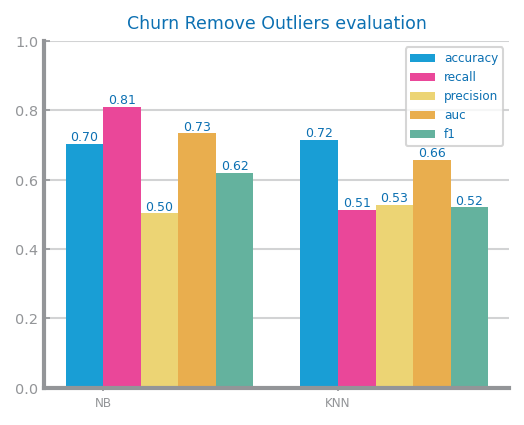

In [18]:
# Figure 21 - evaluating Outlier approaches - Approach 1 - OK

# Splitting dataset into train and test datasets
#filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\telecom_churn_dataset\\Telecom_Customers_Churn.csv"

train = data_out1.head(5000)
test = data_out1.tail(1000)
test.head()

file_tag = "Churn"
target = "Churn"

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} Remove Outliers evaluation", percentage=True
)
savefig(f"images/21_{file_tag}_eval.png")
show()


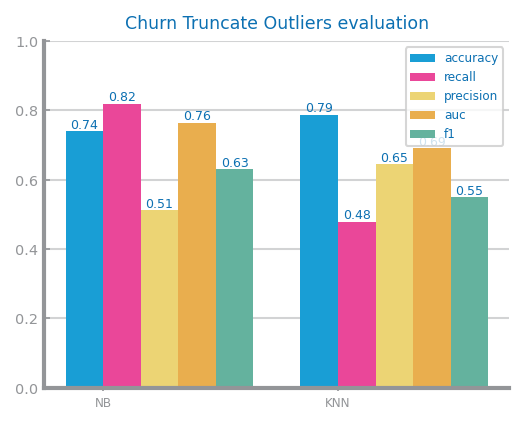

In [19]:
# Figure 21 - evaluating Outlier approaches - Approach 2 - Truncate outliers - NOK

# Splitting dataset into train and test datasets
#filename = "C:\\Users\\LENOVO\\Documents\\Projetos\\Data_science\\telecom_churn_dataset\\Telecom_Customers_Churn.csv"

train = data_out2.head(5000)
test = data_out2.tail(1000)
test.head()

file_tag = "Churn"
target = "Churn"

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} Truncate Outliers evaluation", percentage=True
)
savefig(f"images/21_{file_tag}_eval_2.png")
show()


In [20]:
print(data_out1.shape)
data_out1.tail()

(5920, 24)


,tenure,InternetService,PaymentMethod,MonthlyCharges,Cost/service,SecurityCost,StreamingCost,TotalCharges,gender,SeniorCitizen,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn
7036,12.0,1.0,1.0,60.65,148.660,148.660,297.32,743.30,1,0,...,0,1,1,1,1,1,0,1,0,0
7037,72.0,0.0,2.0,21.15,1419.400,0.000,0.00,1419.40,1,0,...,0,0,0,0,0,0,0,0,1,0
7038,24.0,1.0,0.0,84.80,331.750,331.750,663.50,1990.50,0,0,...,1,0,1,1,1,1,0,1,0,0
7040,11.0,1.0,1.0,29.60,173.225,173.225,0.00,346.45,1,0,...,1,0,0,0,0,0,1,0,0,0
7041,4.0,2.0,0.0,74.40,102.200,0.000,0.00,306.60,0,1,...,0,0,0,0,0,0,1,0,0,1


In [21]:
# Codigo professora

#file = "stroke"
#target = "stroke"
#vars: list[str] = trn.columns.to_list()

#trn: DataFrame = read_csv("data/stroke_mvi_encoded_trn.csv", index_col="id", na_values="")
#target_trn: Series = trn.pop(target)

#transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(trn)

#trn_zscore = DataFrame(transf.transform(trn), index=trn.index)
#trn_zscore[target] = target_trn
#trn_zscore.columns = vars
#trn_zscore.to_csv(f"data/{file}_scaled_zscore_trn.csv", index="id")

#tst: DataFrame = read_csv("data/stroke_mvi_encoded_tst.csv", index_col="id", na_values="")
#target_tst: Series = tst.pop(target)
#tst_zscore = DataFrame(transf.transform(tst), index=tst.index)
#tst_zscore[target] = target_tst
#tst_zscore.columns = vars
#tst_zscore.to_csv(f"data/{file}_scaled_zscore_tst.csv", index="id")

In [22]:
# Figure 23 - Standardização Z 

from pandas import read_csv, DataFrame, Series
from sklearn.preprocessing import StandardScaler

#data_out1
file = "churn"
#data: DataFrame = read_csv("data/stroke_mvi_encoded.csv", index_col="id", na_values="")
target = "Churn"
vars: list[str] = data_out1.columns.to_list()
target_data: Series = data_out1.pop(target)

transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(data_out1)
df_zscore = DataFrame(transf.transform(data_out1), index=data_out1.index)
df_zscore[target] = target_data
df_zscore.columns = vars
df_zscore.to_csv(f"data/{file}_scaled_zscore.csv", index="id")

print(df_zscore.describe())

             tenure  InternetService  PaymentMethod  MonthlyCharges  \
count  5.920000e+03     5.920000e+03   5.920000e+03    5.920000e+03   
mean   1.680338e-17     1.422286e-16   5.761157e-17    1.320265e-17   
std    1.000084e+00     1.000084e+00   1.000084e+00    1.000084e+00   
min   -1.229881e+00    -1.523112e+00  -1.246441e+00   -1.496226e+00   
25%   -9.435809e-01    -2.364649e-01  -1.246441e+00   -1.074639e+00   
50%   -1.801143e-01    -2.364649e-01  -2.989667e-01    1.621025e-01   
75%    8.219356e-01     1.050182e+00   6.485080e-01    8.362911e-01   
max    2.205719e+00     1.050182e+00   1.595983e+00    1.978034e+00   

       Cost/service  SecurityCost  StreamingCost  TotalCharges        gender  \
count  5.920000e+03  5.920000e+03   5.920000e+03  5.920000e+03  5.920000e+03   
mean  -1.116224e-16 -6.601326e-18  -3.690741e-17 -7.681543e-17 -7.201447e-18   
std    1.000084e+00  1.000084e+00   1.000084e+00  1.000084e+00  1.000084e+00   
min   -1.213176e+00 -6.349358e-01  -6.44

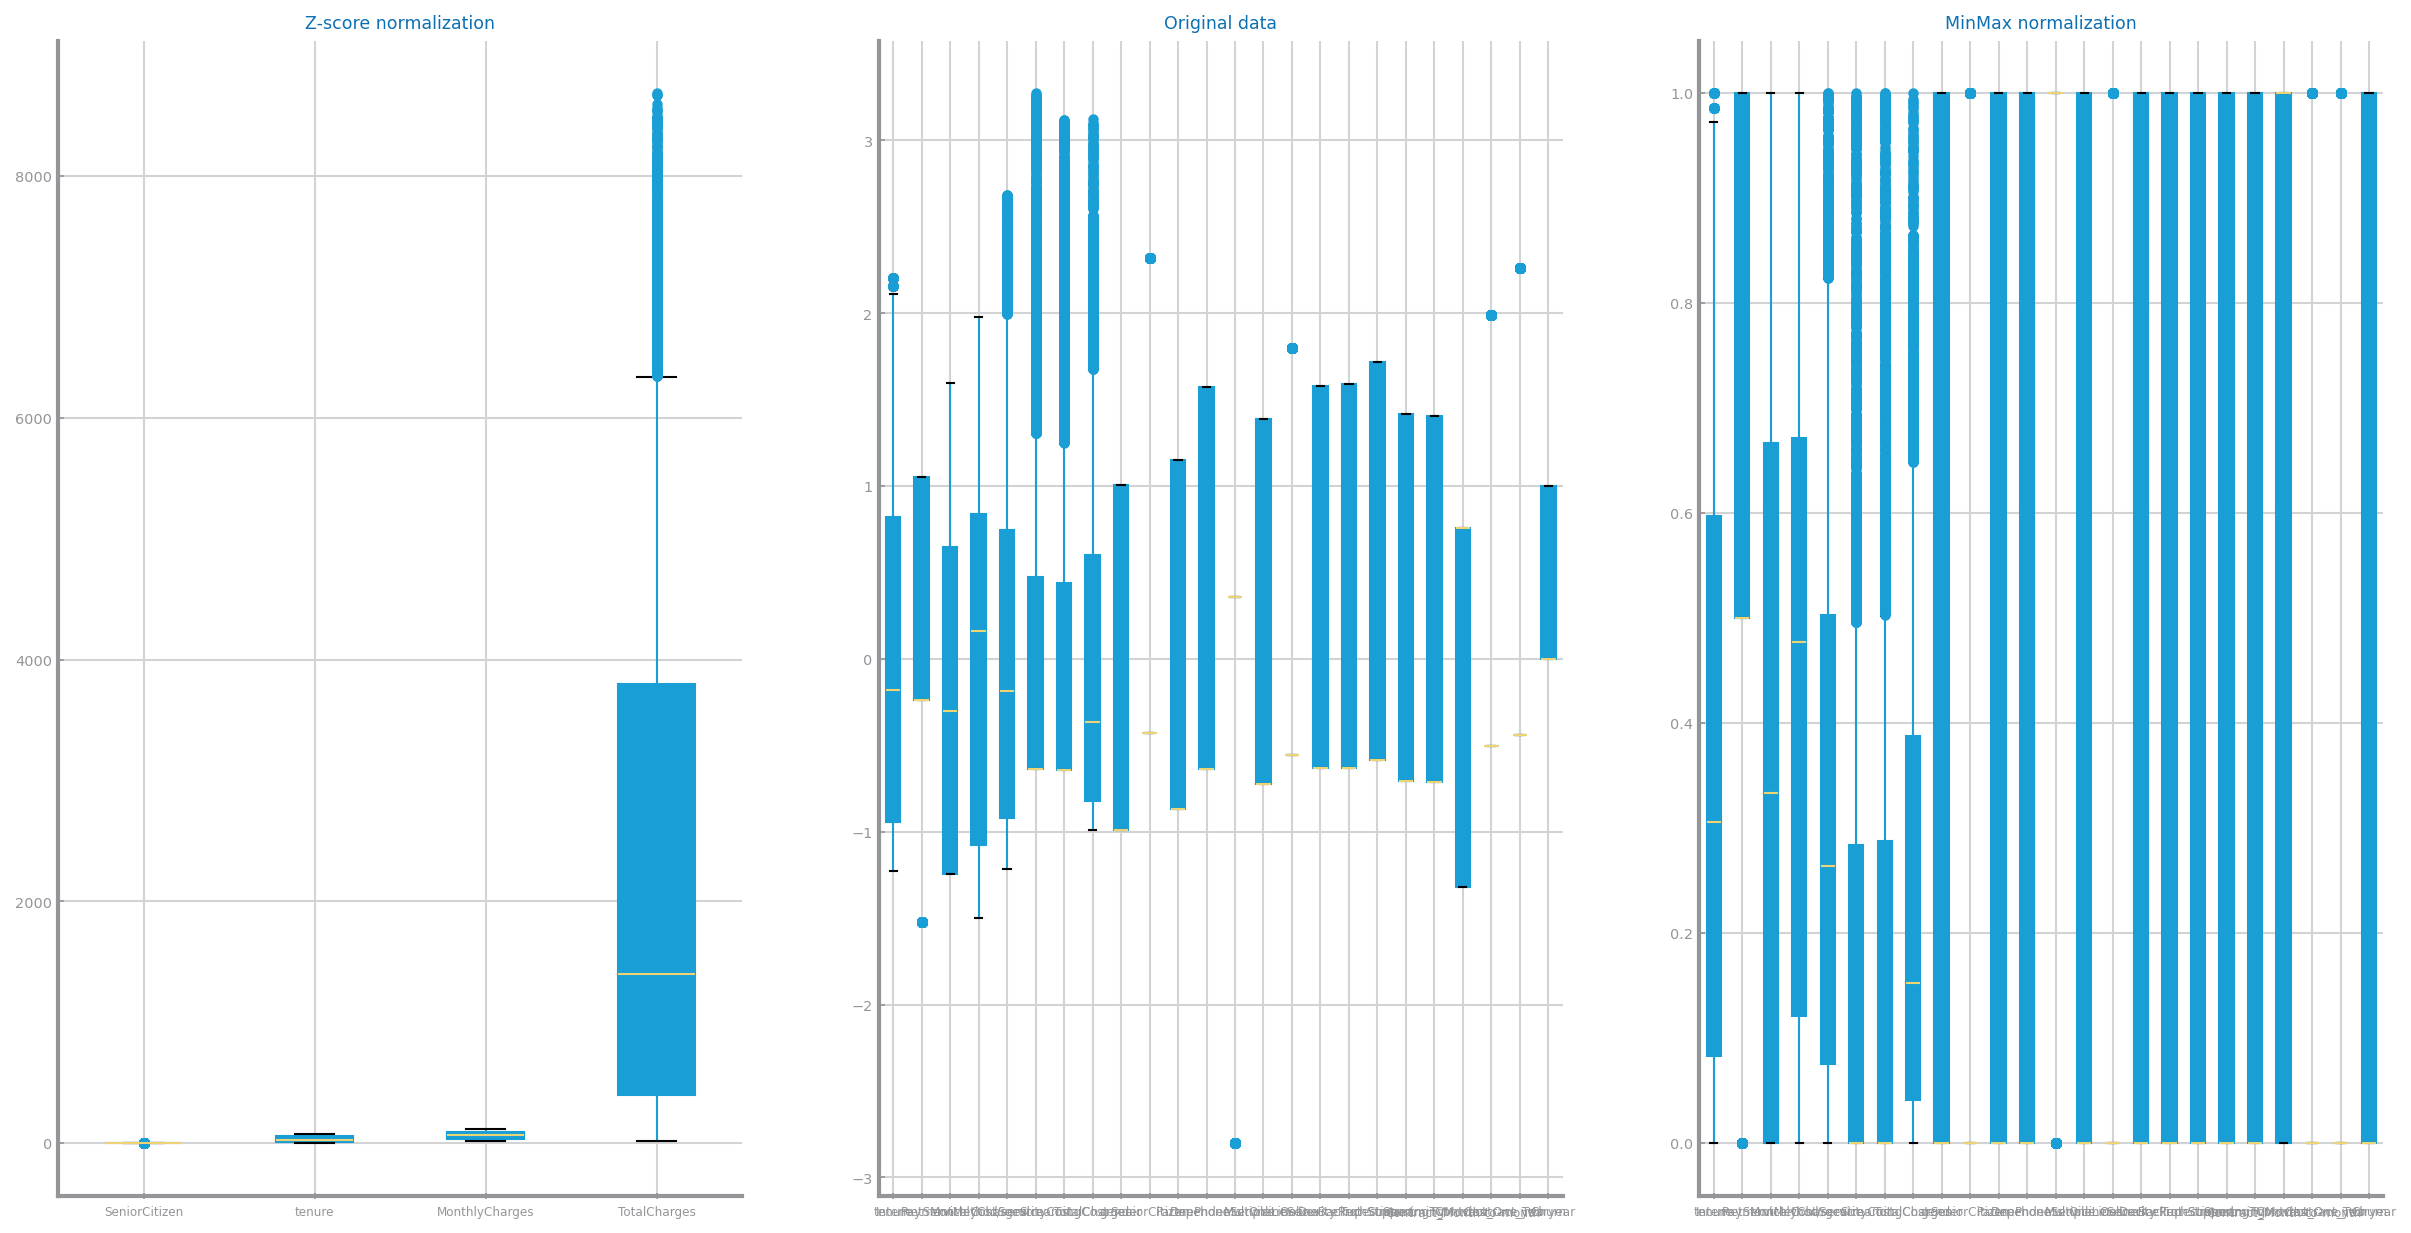

In [23]:
from sklearn.preprocessing import MinMaxScaler

transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(data_out1)
df_minmax = DataFrame(transf.transform(data_out1), index=data_out1.index)
df_minmax[target] = target_data
df_minmax.columns = vars
df_minmax.to_csv(f"data/{file}_scaled_minmax.csv", index="id")

from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 1].set_title("Original data")
data.boxplot(ax=axs[0, 0])
axs[0, 0].set_title("Z-score normalization")
df_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title("MinMax normalization")
df_minmax.boxplot(ax=axs[0, 2])
show()

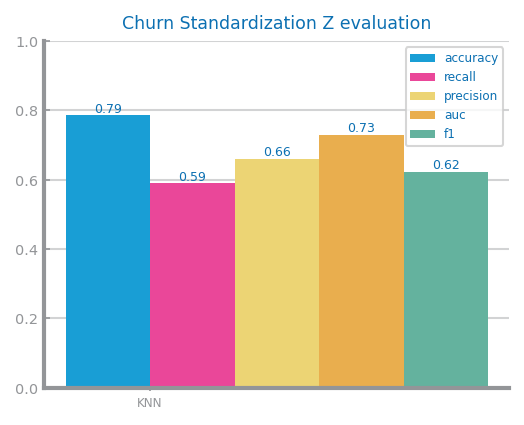

In [24]:
# Figura 23 - Evaluating Scaling Standardização Z - NOK

from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN


def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    #eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    #if eval_NB != {} and eval_KNN != {}:
    if eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            #eval[met] = [eval_NB[met], eval_KNN[met]]
            eval[met] = [eval_KNN[met]]
    return eval

train = df_zscore.head(5000)
test = df_zscore.tail(1000)

file_tag = "Churn"
target = "Churn"

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["KNN"], eval, title=f"{file_tag} Standardization Z evaluation", percentage=True
)
savefig(f"images/23_{file_tag}_Scaling_Z_eval_.png")
show()


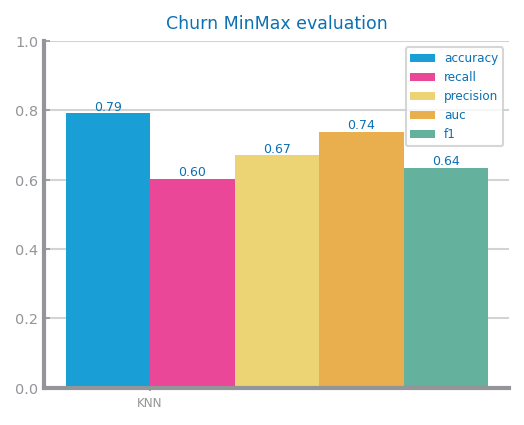

In [25]:
# Figura 23 - Evaluating Scaling MinMax Z - OK 
train = df_minmax.head(5000)
test = df_minmax.tail(1000)

file_tag = "Churn"
target = "Churn"

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["KNN"], eval, title=f"{file_tag} MinMax evaluation", percentage=True
)
savefig(f"images/23_{file_tag}_Scaling_MinMax_eval_.png")
show()

In [26]:
# Figura 25
df_zscore.tail(10)


,tenure,InternetService,PaymentMethod,MonthlyCharges,Cost/service,SecurityCost,StreamingCost,TotalCharges,gender,SeniorCitizen,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn
7029,-0.943581,-0.236465,-0.298967,-0.580380,-1.001853,-0.634936,-0.297969,-0.840217,1.007460,2.319334,...,-0.555757,-0.633129,-0.628419,-0.582032,1.416546,1.406899,0.758766,-0.502902,-0.442127,0
7030,-1.134448,-1.523112,-1.246441,-1.433185,-1.135608,-0.634936,-0.644843,-0.977061,1.007460,-0.431158,...,-0.555757,-0.633129,-0.628419,-0.582032,-0.705943,-0.710783,0.758766,-0.502902,-0.442127,0
7032,-1.182164,1.050182,-0.298967,0.517584,-1.174271,-0.634936,-0.644843,-0.954743,-0.992595,2.319334,...,-0.555757,-0.633129,-0.628419,-0.582032,-0.705943,-0.710783,0.758766,-0.502902,-0.442127,1
7033,0.583352,1.050182,1.595983,0.298691,1.172662,-0.634936,-0.644843,0.604173,-0.992595,-0.431158,...,-0.555757,-0.633129,-0.628419,-0.582032,-0.705943,-0.710783,0.758766,-0.502902,-0.442127,0
7035,-0.323264,1.050182,0.648508,0.620901,-0.211771,-0.634936,0.094482,-0.086868,-0.992595,-0.431158,...,-0.555757,-0.633129,-0.628419,-0.582032,1.416546,-0.710783,0.758766,-0.502902,-0.442127,0
7036,-0.657281,-0.236465,-0.298967,-0.011260,-0.833457,-0.279457,-0.056746,-0.546563,1.007460,-0.431158,...,-0.555757,1.579458,1.591295,1.718120,1.416546,1.406899,-1.317930,1.988460,-0.442127,0
7037,2.205719,-1.523112,0.648508,-1.394660,2.675869,-0.634936,-0.644843,-0.133156,1.007460,-0.431158,...,-0.555757,-0.633129,-0.628419,-0.582032,-0.705943,-0.710783,-1.317930,-0.502902,2.261792,0
7038,-0.084681,-0.236465,-1.246441,0.834540,-0.327829,0.158351,0.667555,0.216049,-0.992595,-0.431158,...,1.799348,-0.633129,1.591295,1.718120,1.416546,1.406899,-1.317930,1.988460,-0.442127,0
7040,-0.704998,-0.236465,-0.298967,-1.098718,-0.765618,-0.220717,-0.644843,-0.789221,1.007460,-0.431158,...,1.799348,-0.633129,-0.628419,-0.582032,-0.705943,-0.710783,0.758766,-0.502902,-0.442127,0
7041,-1.039014,1.050182,-1.246441,0.470303,-0.961763,-0.634936,-0.644843,-0.813588,-0.992595,2.319334,...,-0.555757,-0.633129,-0.628419,-0.582032,-0.705943,-0.710783,0.758766,-0.502902,-0.442127,1
